# Explorando la rotación de clientes - customer churn 📊

Ahora que sabemos qué es la rotación de clientes, examinemos la estructura de nuestro conjunto de datos de clientes.

Poder verificar la estructura de los datos es un paso fundamental en el proceso de modelado de abandono y, a menudo se pasa por alto.

Usaremos `pandas` métodos como `.info()` para tener una idea de su estructura y notar las diferentes columnas (también conocidas como "características-`features`" en Machine Learning), como `CustServ_Calls`, que denota la cantidad de llamadas de servicio al cliente que hizo el cliente, y `State`, que indica el estado del que es el cliente.


Una característica es de particular interés para nosotros: `Churn`, que puede tomar dos valores, `yes` y `no`, que indican si el cliente ha abandonado o no. Podemos acceder usando data_phone['Churn`].

Nuestra pregunta es:

¿Cuántos abandonos tiene el conjunto de datos y cuántos no abandonos? Para responder fácilmente a esto,  usaremos el método .`value_counts()` en data_phone['Churn'].

In [5]:
from urllib.request import urlretrieve
import pandas as pd

#-- Asignación URL
url = 'https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv'

#-- Guardar archivo localmente.

urlretrieve(url)

#-- Leer archivo
data_phones = pd.read_csv(url)

#-- Verificamos los datos

data_phones.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [6]:
#-- Consultar cuantos si y no hay en Churn

data_phones['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

Recordemos que estamos interesados en el grupo de clientes que abandonan el servicio , en este caso seria la columna `Churn`.Como pudimos ver la mayoria de estos clientes no abandonaron.

Nuestro objetivo es construir un modelo que use la información sobre cada cliente en el conjunto de datos para clasificar si un nuevo cliente abandonara o no el servicio.

Este modelo, por lo tanto, tiene dos resultados o clases:

* `Yes`- Si el cliente abandona 😥.

* `No`- Si el cliente no abandona 😀.


Incluso antes de llegar a la etapa de construcción del modelo, podemos usar el análisis exploratorio de datos -(EDA) para identificar las diferencias entre estos dos resultados y esto lo haremos con el objetivo de comprender mejor los impulsores de la perdida de clientes.

Recordemos que pandas tiene un método para agrupar datos llamado `.groupby()` veamos que podemos hacer...🤨

### Agrupando por Estado 🗺️.

Cuando se trata de datos de clientes, las regiones geográficas pueden desempeñar un papel importante a la hora de determinar si un cliente cancelará su servicio o no. Es posible que haya notado que hay una columna 'Estado' en el conjunto de datos. En este ejemplo, agruparemos `'State'` y `'Churn'` para contar el número de abandonos y no abandonos por estado.




In [8]:
#-- Contamos el numero de abandonos y no abandonos por estado.

print(data_phones.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64


## Explorando nuestros datos.

Una de las partes mas importantes del flujo de trabajo de EDA es la visualicación de datos ya que no sayuda a comprender mejor nuestros datos, nos permite comunicar de manera efectiva ideas tanto a partes técnicas como no técnicas.

En Python, la biblioteca `seaborn` nos permite crear fácilmente tramas informativas y atractivas.

Suopngamos que deseamos visualizar la distribución de las longitudes de cuenta de nuestros clientes, muchos algoritmos de Machine Learning hacen suposiciones sobre cómo se distribuyen los datos, por lo que es importante saber cómo se distribuyen las variables es nuetro conjunto de datos antes de aplicar algoritmos de ML.

Un histograma es una forma efectiva de visualizar la ditribución de una variable y podemos crear uno usando `sns.distplot`.

* Primero importamos matplotlib & Seaborn.

* Despues usamos `sns.distplot()` pasando como argumento el parametro que queremos graficar. 

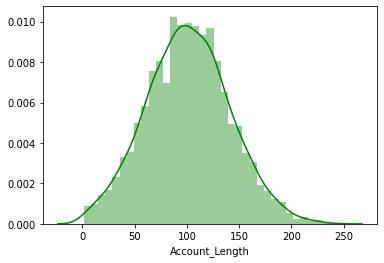

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#-- histograma
sns.distplot(data_phones['Account_Length'],color='green')

#-- Mostramos el histograma
plt.show()

Podemos ver aquí que se asemeja a una curva de campana , también conocida como distribución normal.Resulta que muchas cosas que medimos en el mundo real están bien aproximadas por la distribución normal & muchos modelos  de ML en realidad suponen que nuestron datos estan distribuidos normalmente.

### ¿Afecta el tamaño de la cuenta con el abandono de servicio?

Ahora visualicemos las diferencias en la duración de la cuenta en relacion con los que abandonan y no, una forma de hacer esto es mediante un diagrama de cajas o boxplot, que podemos crear usando `sns.boxplot` especificando los parametros de `x`e `y`:

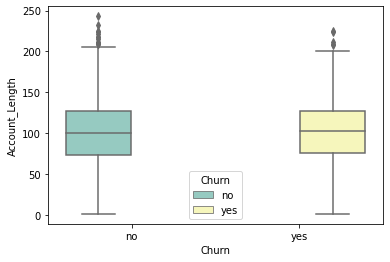

In [19]:
#-- Boxplot.


sns.boxplot(x='Churn',
            y='Account_Length',
            data = data_phones,
            palette='Set3',
            hue="Churn")



plt.show()

Como podemos ver, no parece haber ninguna diferencia notable en la duración de la cuenta, recordemos que la linea de enmedio del diagrama representa la media, los cuadros de colores representan el 50% del las longitudes de cuenta para cada grupo.

Los valores que van aquí van del percentil 25 al percentil 75.

Los puntos en la parte superior representan los datos atípicos que podemos elminar con el parametro `sym`.

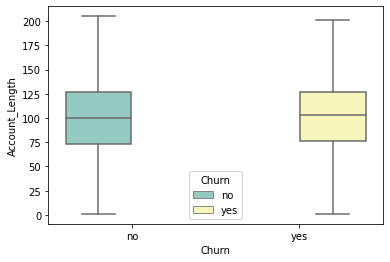

In [20]:
#-- Boxplot.


sns.boxplot(x='Churn',
            y='Account_Length',
            data = data_phones,
            palette='Set3',
            sym="",
            hue="Churn")

plt.show()

Seaborn nos permite agregar fácilmente una tercera variable a nuestra trama, por ejemplo estamos interesados en visualizar si `Int1_Plan` afecta las decisiones de nuestros cliente, esta columna describe los clientes que tienen una cuenta para llamadas internacionales.

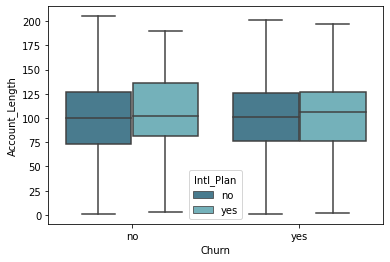

In [22]:
#-- Boxplot.


sns.boxplot(x='Churn',
            y='Account_Length',
            data = data_phones,
            palette='GnBu_d',
            sym="",
            hue="Intl_Plan")

plt.show()

Desde la trama , parece que en cuanto a prediccion de abandono de servicio no importa si un cliente tenia o no un plan internacional.

# Explorando distribuciones de caracteristicas


Recordemos que la característica 'Account_Length' se distribuyó normalmente. Visualicemos ahora las distribuciones de las siguientes características usando la gráfica de distribución de seaborn:

* 'Day_Mins'
* 'Eve_Mins'
* 'Night_Mins'
* 'Intl_Mins'



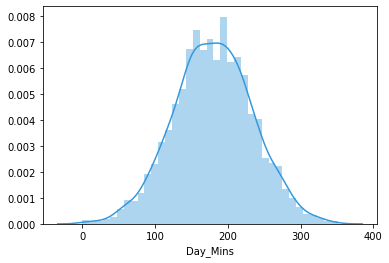

In [30]:
#-- Minutos diarios
_ = sns.distplot(data_phones['Day_Mins'],color='#3498db')

#-- plot
plt.show()

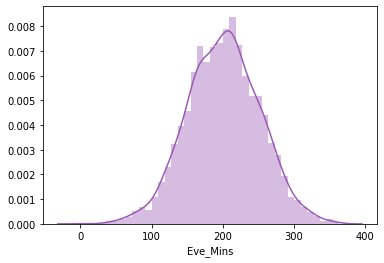

In [29]:
#-- Eve Mins
_ = sns.distplot(data_phones['Eve_Mins'],color='#9b59b6')

#-- plot
plt.show()

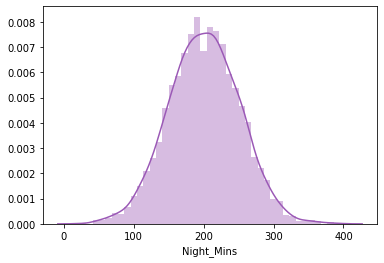

In [34]:

#-- Night Mins
_ = sns.distplot(data_phones['Night_Mins'],color='#9b59b6')

#-- plot
plt.show()

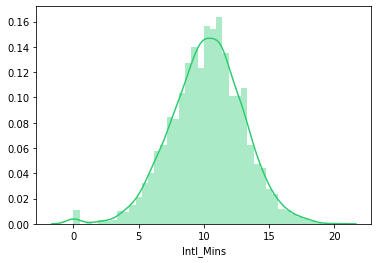

In [33]:
# international mins
_ = sns.distplot(data_phones['Intl_Mins'],color='#2ecc71')

# plot
plt.show()

Podemos ver que todas estas características parecen estar bien aproximadas por la distribución normal. Si este no fuera el caso, tendríamos que considerar aplicar una transformación de características de algún tipo.

### ¿Relación entre la perdida de clientes y servicio de llamadas al cliente?

Ya vimos que no hay mucha diferencia en la duración de las cuentas entre los que abandonan y los que no lo hace, pero...¿habra diferencia en la cantidad de llamadas de servicio al cliente que reciben nuestros clientes y su abandono?

Visualicemos ahora esta diferencia usando un diagrama de caja e incorporemos otras características de interés: 

* ¿los clientes que tienen planes internacionales hacen más llamadas de servicio al cliente? 

* ¿O tienden a agitar más? 

* ¿Qué hay de los planes de correo de voz?



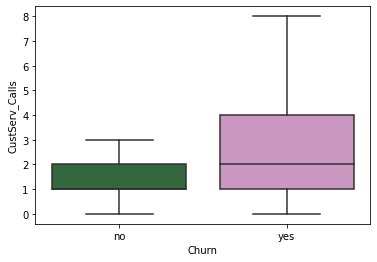

In [38]:
# Iniciamos gráfico

sns.boxplot(x= 'Churn',
            y = 'CustServ_Calls',
            data = data_phones,
            palette='cubehelix',
            sym='')

plt.show()

Ahora agregemos una tercera variable a este gráfico, 'Vmail_Plan', para visualizar si tener un plan de correo de voz afecta o no la cantidad de llamadas de servicio al cliente o abandono.

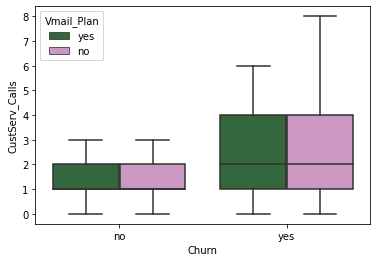

In [40]:
# Iniciamos gráfico

sns.boxplot(x= 'Churn',
            y = 'CustServ_Calls',
            data = data_phones,
            palette='cubehelix',
            sym='',
            hue= 'Vmail_Plan')

plt.show()

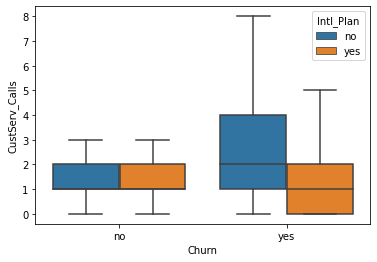

In [41]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = data_phones,
            sym = "",
            hue = "Intl_Plan")

#-- plot
plt.show()

Aquí hay algunas ideas muy interesantes. Parece que los clientes que abandonan terminan dejando más llamadas de servicio al cliente, a menos que estos clientes también tengan un plan internacional, en cuyo caso dejan menos llamadas de servicio al cliente. Este tipo de información es realmente útil para comprender mejor los impulsores de la deserción. 




---

